<a href="https://colab.research.google.com/github/cesarrivera52/Concentracion2/blob/main/Extracci%C3%B3n%20de%20Caracter%C3%ADsticas/Rio%20de%20Janeiro/3_4_RioDeJaneiro_Extraccion_Caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paso 0 **Cargar info y librerias**

In [1]:
#Instalamos librebria para analisis de variables categoricas
%pip install funpymodeling

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.2 MB/s 

In [2]:
#Importamos las librerias pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [47]:
City= pd.read_csv('1datos_limpios_iqr.csv')

In [48]:
City.drop('Unnamed: 0', axis=1, inplace=True)

In [49]:
City.isnull().sum().sum()

0

# Paso 1 **Preprocesamiento**


## **Columnas a evaluar:**

Agregamos variables categoricas de las variables cuantitativas

1.   host_response_rate
2.   host_acceptance_rate
3.  host_total_listings_count
4.  accommodates
5.  bathrooms
6.  beds
7.  price
8.  'availability_60'
9. 'availability_90'
10. 'availability_365'
11. 'number_of_reviews_ltm'
12. 'reviews_per_month'


### **Strungens** host_response_rate

In [50]:
City['host_response_rate'].info()
n_1=len(City)

<class 'pandas.core.series.Series'>
RangeIndex: 34664 entries, 0 to 34663
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
34664 non-null  float64
dtypes: float64(1)
memory usage: 270.9 KB


In [51]:
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=City['host_response_rate'].max()
Min_2_1=City['host_response_rate'].min()
Limites= [Min_2_1, Max_1_1]
Limites

[0.85, 1.0]

In [52]:
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
R_2_2

0.15000000000000002

In [53]:
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(Max_1_1)
ni_1

1.0

In [54]:
#Categorización de variables
intervalos=np.linspace(0,Max_1_1,round(ni_1+1))
len(intervalos)

2

In [55]:
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1
i

0.15000000000000002

In [56]:
#Categorización de variables
intervalos=np.linspace(-0.0000000001,Max_1_1,round(ni_1+2))
intervalos

array([-1.e-10,  5.e-01,  1.e+00])

In [57]:
#Creamos las categorias
categorias = [
    'Buena', 'Mala'
]



In [58]:
#Finalmente creamos las categorias en la columna numerica
City['host_response_rate']=pd.cut(x=City['host_response_rate'],bins=intervalos,labels=categorias)
City['host_response_rate'].head()

,host_response_rate
0,Mala
1,Mala
2,Mala
3,Mala
4,Mala


In [59]:
City['host_response_rate'].isnull().sum()

0

### **Strungens** host_acceptance_rate

In [60]:
x='host_acceptance_rate'
#Calculamos el numero total de la poblacion "n"
City[x].info()
n_1=len(City)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=City[x].max()
Min_2_1=City[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(Max_1_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 34664 entries, 0 to 34663
Series name: host_acceptance_rate
Non-Null Count  Dtype  
--------------  -----  
34664 non-null  float64
dtypes: float64(1)
memory usage: 270.9 KB


In [61]:
Limites

[0.1, 1.0]

In [62]:
#Categorización de variables
intervalos=np.linspace(-0.0000000001,Max_1_1,round(ni_1+2))
len(intervalos)

3

In [63]:
#Creamos las categorias
categorias = [
    'Buena', 'Mala'
]


In [64]:
City['host_acceptance_rate']=pd.cut(x=City['host_acceptance_rate'],bins=intervalos,labels=categorias)
City['host_acceptance_rate'].head()

,host_acceptance_rate
0,Mala
1,Mala
2,Buena
3,Mala
4,Mala


In [65]:
City['host_acceptance_rate'].isnull().sum()

0

### **Strungens** host_total_listings_count

In [66]:
x='host_total_listings_count'
#Calculamos el numero total de la poblacion "n"
City[x].info()
n_1=len(City)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=City[x].max()
Min_2_1=City[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(Max_1_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 34664 entries, 0 to 34663
Series name: host_total_listings_count
Non-Null Count  Dtype  
--------------  -----  
34664 non-null  float64
dtypes: float64(1)
memory usage: 270.9 KB


In [67]:
Limites

[1.0, 18.0]

In [68]:
#Categorización de variables
intervalos=np.linspace(-0.0000000001,Max_1_1,round(ni_1+2))
len(intervalos)

7

In [69]:
#Creamos las categorias
categorias = [
    'Disponible', 'Poco disponible', 'Abundante', 'Escaso',
    'Frecuente', 'Raro'
]

In [70]:
City[x]=pd.cut(x=City[x],bins=intervalos,labels=categorias)
City[x].isnull().sum()

0

### **Strungens** accommodates

In [71]:
x='accommodates'
#Calculamos el numero total de la poblacion "n"
City[x].info()
n_1=len(City)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=City[x].max()
Min_2_1=City[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(Max_1_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 34664 entries, 0 to 34663
Series name: accommodates
Non-Null Count  Dtype  
--------------  -----  
34664 non-null  float64
dtypes: float64(1)
memory usage: 270.9 KB


In [72]:
Limites

[1.0, 9.0]

In [73]:
#Categorización de variables
intervalos=np.linspace(-0.0000000001,Max_1_1,round(ni_1+2))
len(intervalos)

6

In [74]:
#Creamos las categorias
categorias = [
    'Disponible', 'Poco disponible', 'Abundante', 'Escaso',
    'Frecuente'
]

In [75]:
City[x]=pd.cut(x=City[x],bins=intervalos,labels=categorias)
City[x].isnull().sum()

0

### **Strungens** bathrooms

In [76]:
x='bathrooms'
#Calculamos el numero total de la poblacion "n"
City[x].info()
n_1=len(City)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=City[x].max()
Min_2_1=City[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(Max_1_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 34664 entries, 0 to 34663
Series name: bathrooms
Non-Null Count  Dtype  
--------------  -----  
34664 non-null  float64
dtypes: float64(1)
memory usage: 270.9 KB


In [77]:
Limites

[0.0, 3.5]

In [78]:
#Categorización de variables
intervalos=np.linspace(-0.0000000001,Max_1_1,round(ni_1+2))
len(intervalos)

5

In [79]:
#Creamos las categorias
categorias = [
    'Disponible', 'Poco disponible', 'Abundante', 'Escaso',
]

In [80]:
City[x]=pd.cut(x=City[x],bins=intervalos,labels=categorias)
City[x].isnull().sum()

0

### **Strungens** beds

In [81]:
x='beds'
#Calculamos el numero total de la poblacion "n"
City[x].info()
n_1=len(City)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=City[x].max()
Min_2_1=City[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(Max_1_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 34664 entries, 0 to 34663
Series name: beds
Non-Null Count  Dtype  
--------------  -----  
34664 non-null  float64
dtypes: float64(1)
memory usage: 270.9 KB


In [82]:
Limites

[0.0, 6.0]

In [83]:
#Categorización de variables
intervalos=np.linspace(-0.0000000001,Max_1_1,round(ni_1+2))
len(intervalos)

6

In [84]:
#Creamos las categorias
categorias = [
    'Disponible', 'Poco disponible', 'Abundante', 'Escaso', 'Normal'
]

In [85]:
City[x]=pd.cut(x=City[x],bins=intervalos,labels=categorias)
City[x].isnull().sum()

0

#Cambiar la variable de moneda brasileña a dolares USD

### **Strungens** price

In [87]:
#Modificar el valor de la moneda local para conversión a dls USA
x=.18
tipo_de_cambio=0.18

In [90]:
City['price'].head()

,price
0,310.0
1,203.0
2,220.0
3,201.0
4,321.0


In [95]:
City['price']=(City['price'])*.tipo_de_cambio


In [96]:
City['price'].head()

,price
0,55.80
1,36.54
2,39.60
3,36.18
4,57.78


In [97]:
x='price'
#Calculamos el numero total de la poblacion "n"
City[x].info()
n_1=len(City)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=City[x].max()
Min_2_1=City[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(Max_1_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 34664 entries, 0 to 34663
Series name: price
Non-Null Count  Dtype  
--------------  -----  
34664 non-null  float64
dtypes: float64(1)
memory usage: 270.9 KB


In [98]:
Limites

[0.0, 204.48]

In [104]:
#Categorización de variables
intervalos=np.linspace(-1,Max_1_1,round(ni_1+2))
print(len(intervalos))
print(intervalos)

11
[ -1.     19.548  40.096  60.644  81.192 101.74  122.288 142.836 163.384
 183.932 204.48 ]


In [106]:
#Creamos las categorias
categorias = [
    '0-19', '20-40', '41-60', '61-81', '82-101','102-122','123-142','143-163','164-183','184-205'
]

In [107]:
City[x]=pd.cut(x=City[x],bins=intervalos,labels=categorias)
City[x].isnull().sum()

0

### **Strungens** Availability 60

In [108]:
#Calculamos el numero total de la poblacion "n"
City['availability_60'].astype(np.float64).info()
n_1=len(City)

<class 'pandas.core.series.Series'>
RangeIndex: 34664 entries, 0 to 34663
Series name: availability_60
Non-Null Count  Dtype  
--------------  -----  
34664 non-null  float64
dtypes: float64(1)
memory usage: 270.9 KB


In [109]:
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1=City['availability_60'].max()
Min_1=City['availability_60'].min()
Limites= [Min_1, Max_1]
Limites

[0, 60]

In [110]:
#Calculamos el Rango R
R=Max_1-Min_1
R

60

In [111]:
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(Max_1)
ni_1

6.903462151273697

In [112]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni_1
i

8.691291222467255

In [113]:
#Categorización de variables
intervalos=np.linspace(-0.0000000001,Max_1,round(ni_1+1))
intervalos

array([-1.00000000e-10,  8.57142857e+00,  1.71428571e+01,  2.57142857e+01,
        3.42857143e+01,  4.28571429e+01,  5.14285714e+01,  6.00000000e+01])

In [114]:
#Creamos las categorias
categorias = [
    'Disponible', 'Poco disponible', 'Abundante', 'Escaso',
    'Frecuente', 'Raro','Comun'
]



In [115]:
#Finalmente creamos las categorias en la columna numerica
City['availability_60']=pd.cut(x=City['availability_60'],bins=intervalos,labels=categorias)
City['availability_60'].head()

,availability_60
0,Escaso
1,Comun
2,Escaso
3,Poco disponible
4,Raro


In [116]:
City['availability_60'].isnull().sum()

0

### **Strungens** Availability 90

In [117]:
#Calculamos el numero total de la poblacion "n"
City['availability_90'].info()
n_1=len(City)

<class 'pandas.core.series.Series'>
RangeIndex: 34664 entries, 0 to 34663
Series name: availability_90
Non-Null Count  Dtype
--------------  -----
34664 non-null  int64
dtypes: int64(1)
memory usage: 270.9 KB


In [118]:
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_2=City['availability_90'].max()
Min_2=City['availability_90'].min()
Limites= [Min_2, Max_2]
Limites

[0, 90]

In [119]:
#Calculamos el Rango R
R_2=Max_2-Min_2
R_2

90

In [120]:
#Categorización de variables
intervalos=np.linspace(-0.01,Max_2,round(ni_1+1))
len(intervalos)

8

In [121]:
#Creamos las categorias
categorias = [
    'Disponible', 'Poco disponible', 'Abundante', 'Escaso',
    'Frecuente', 'Raro', 'Común'
]


In [122]:
#Finalmente creamos las categorias en la columna numerica
City['availability_90']=pd.cut(x=City['availability_90'],bins=intervalos,labels=categorias)
City['availability_90']

,availability_90
0,Escaso
1,Raro
2,Escaso
3,Poco disponible
4,Raro
...,...
34659,Raro
34660,Común
34661,Abundante
34662,Común


In [123]:
City['availability_90'].isnull().sum()

0

### **Strungens** Availability 365

In [124]:
#Calculamos el numero total de la poblacion "n"
City['availability_365'].info()
n_1=len(City)

<class 'pandas.core.series.Series'>
RangeIndex: 34664 entries, 0 to 34663
Series name: availability_365
Non-Null Count  Dtype
--------------  -----
34664 non-null  int64
dtypes: int64(1)
memory usage: 270.9 KB


In [125]:
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_3=City['availability_365'].max()
Min_3=City['availability_365'].min()
Limites= [Min_3, Max_3]
Limites

[0, 365]

In [126]:
#Calculamos el Rango R
R_3=Max_3-Min_3
R_3

365

In [127]:
#Categorización de variables
intervalos=np.linspace(-0.01,Max_3,round(ni_1+1))
intervalos

array([-1.00000000e-02,  5.21342857e+01,  1.04278571e+02,  1.56422857e+02,
        2.08567143e+02,  2.60711429e+02,  3.12855714e+02,  3.65000000e+02])

In [128]:
#Creamos las categorias
categorias = [
    'Disponible', 'Poco disponible', 'Abundante', 'Escaso',
    'Frecuente', 'Raro', 'Común'
]


In [129]:
#Finalmente creamos las categorias en la columna numerica
City['availability_365']=pd.cut(x=City['availability_365'],bins=intervalos,labels=categorias)
City['availability_365']

,availability_365
0,Raro
1,Frecuente
2,Raro
3,Poco disponible
4,Común
...,...
34659,Poco disponible
34660,Raro
34661,Disponible
34662,Frecuente


In [130]:
City['availability_365'].isnull().sum()

0

### **Strungens** number_of_reviews_ltm

In [131]:
#Calculamos el numero total de la poblacion "n"
City['number_of_reviews_ltm'].info()
n_1=len(City)

<class 'pandas.core.series.Series'>
RangeIndex: 34664 entries, 0 to 34663
Series name: number_of_reviews_ltm
Non-Null Count  Dtype  
--------------  -----  
34664 non-null  float64
dtypes: float64(1)
memory usage: 270.9 KB


In [132]:
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_4=City['number_of_reviews_ltm'].max()
Min_4=City['number_of_reviews_ltm'].min()
Limites= [Min_4, Max_4]
Limites

[0.0, 25.0]

In [133]:
#Calculamos el Rango R
R_4=Max_4-Min_4
R_4

25.0

In [134]:
#Categorización de variables
intervalos=np.linspace(-0.01,Max_4,round(ni_1))
intervalos

array([-1.00000000e-02,  4.15833333e+00,  8.32666667e+00,  1.24950000e+01,
        1.66633333e+01,  2.08316667e+01,  2.50000000e+01])

In [135]:
#Creamos las categorias
categorias = [
    'Disponible', 'Poco disponible', 'Abundante', 'Escaso',
    'Frecuente', 'Raro'
]

#Finalmente creamos las categorias en la columna numerica
City['number_of_reviews_ltm']=pd.cut(x=City['number_of_reviews_ltm'],bins=intervalos,labels=categorias)
City['number_of_reviews_ltm']

,number_of_reviews_ltm
0,Raro
1,Raro
2,Disponible
3,Poco disponible
4,Frecuente
...,...
34659,Disponible
34660,Disponible
34661,Disponible
34662,Disponible


### **Strungens** 'reviews_per_month'

In [136]:
#Calculamos el numero total de la poblacion "n"
City['reviews_per_month'].info()
n_1=len(City)

<class 'pandas.core.series.Series'>
RangeIndex: 34664 entries, 0 to 34663
Series name: reviews_per_month
Non-Null Count  Dtype  
--------------  -----  
34664 non-null  float64
dtypes: float64(1)
memory usage: 270.9 KB


In [137]:
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_5=City['reviews_per_month'].max()
Min_5=City['reviews_per_month'].min()
Limites= [Min_5, Max_5]
Limites

[0.01, 3.59]

In [138]:
#Calculamos el Rango R
R_5=Max_5-Min_5
R_5

3.58

In [139]:
#Categorización de variables
intervalos=np.linspace(-0.0000000000001,Max_5,round(ni_1))
intervalos

array([-1.00000000e-13,  5.98333333e-01,  1.19666667e+00,  1.79500000e+00,
        2.39333333e+00,  2.99166667e+00,  3.59000000e+00])

In [140]:
#Creamos las categorias
categorias = [
    'Disponible', 'Poco disponible', 'Abundante', 'Escaso',
    'Frecuente', 'Raro'
]

#Finalmente creamos las categorias en la columna numerica
City['reviews_per_month']=pd.cut(x=City['reviews_per_month'],bins=intervalos,labels=categorias)
City['reviews_per_month']

,reviews_per_month
0,Escaso
1,Abundante
2,Disponible
3,Frecuente
4,Raro
...,...
34659,Poco disponible
34660,Poco disponible
34661,Poco disponible
34662,Poco disponible


In [141]:
City['reviews_per_month'].isnull().sum()

0

#**Modelo Explicativo de variables categoricas**

In [142]:
City.info()
#categoricas = data.select_dtypes(include=[int, np.float64])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34664 entries, 0 to 34663
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   host_name                       34664 non-null  object  
 1   host_since                      34664 non-null  object  
 2   host_location                   34664 non-null  object  
 3   host_response_time              34664 non-null  object  
 4   host_is_superhost               34664 non-null  object  
 5   host_neighbourhood              34664 non-null  object  
 6   host_verifications              34664 non-null  object  
 7   host_has_profile_pic            34664 non-null  object  
 8   host_identity_verified          34664 non-null  object  
 9   neighbourhood                   34664 non-null  object  
 10  neighbourhood_cleansed          34664 non-null  object  
 11  property_type                   34664 non-null  object  
 12  room_type         

Creamos un Df con una variable de puras variables categoricas

In [145]:
categoricas = City.select_dtypes(include='category')


In [146]:
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34664 entries, 0 to 34663
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   host_response_rate         34664 non-null  category
 1   host_acceptance_rate       34664 non-null  category
 2   host_total_listings_count  34664 non-null  category
 3   accommodates               34664 non-null  category
 4   bathrooms                  34664 non-null  category
 5   beds                       34664 non-null  category
 6   price                      34664 non-null  category
 7   availability_60            34664 non-null  category
 8   availability_90            34664 non-null  category
 9   availability_365           34664 non-null  category
 10  number_of_reviews_ltm      34664 non-null  category
 11  reviews_per_month          34664 non-null  category
dtypes: category(12)
memory usage: 409.3 KB


In [144]:
#Obtenemos un analisis univariado de las variables categoricas
freq_tbl(categoricas)

'No categorical variables to analyze.'

# Tablas

## Price

In [157]:
#Obtengo un analisis univariado de una variable categorica en especifico
table1= freq_tbl(categoricas['price'])
table1

,price,frequency,percentage,cumulative_perc
0,20-40,9129,0.263357,0.263357
1,61-81,8090,0.233383,0.496740
2,41-60,7603,0.219334,0.716074
3,82-101,2734,0.078871,0.794946
4,0-19,1860,0.053658,0.848604
5,102-122,1579,0.045552,0.894155
6,123-142,1207,0.034820,0.928975
7,143-163,1167,0.033666,0.962641
8,164-183,887,0.025589,0.988230
9,184-205,408,0.011770,1.000000


In [148]:
#elimino las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table2=table1.drop(['percentage','cumulative_perc'],axis=1)
table2

,price,frequency
0,20-40,9129
1,61-81,8090
2,41-60,7603
3,82-101,2734
4,0-19,1860
5,102-122,1579
6,123-142,1207
7,143-163,1167
8,164-183,887
9,184-205,408


In [149]:
#Obtengo un filtro de los valores mas relevantes de la variable categorica seleccionada
Filtro=table2[table2['frequency']>1]
Filtro

,price,frequency
0,20-40,9129
1,61-81,8090
2,41-60,7603
3,82-101,2734
4,0-19,1860
5,102-122,1579
6,123-142,1207
7,143-163,1167
8,164-183,887
9,184-205,408


In [150]:
#Ajusto el indice de mi DF
Filtro_index=Filtro.set_index('price')
Filtro_index

,frequency
price,
20-40,9129
61-81,8090
41-60,7603
82-101,2734
0-19,1860
102-122,1579
123-142,1207
143-163,1167
164-183,887


Text(0, 0.5, 'Frecuencia')

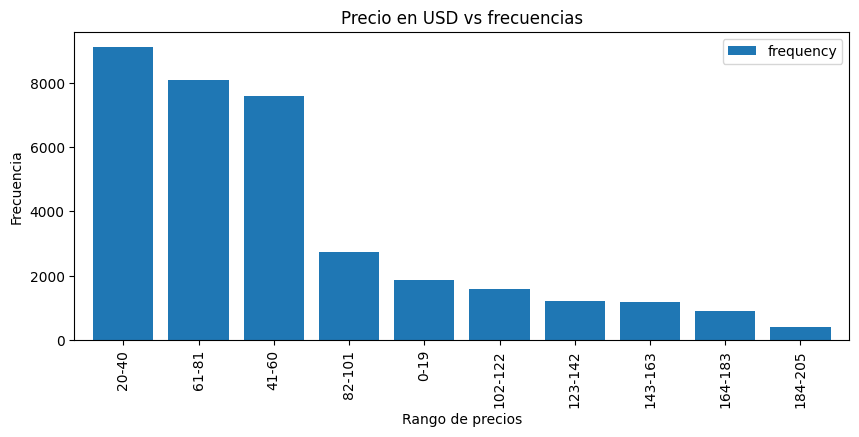

In [151]:
#Realizamos grafico de barras del DF filtrado
Filtro_index.plot(kind='bar',width=0.8,figsize=(10,4))
plt.title('Precio en USD vs frecuencias')
plt.xlabel('Rango de precios')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

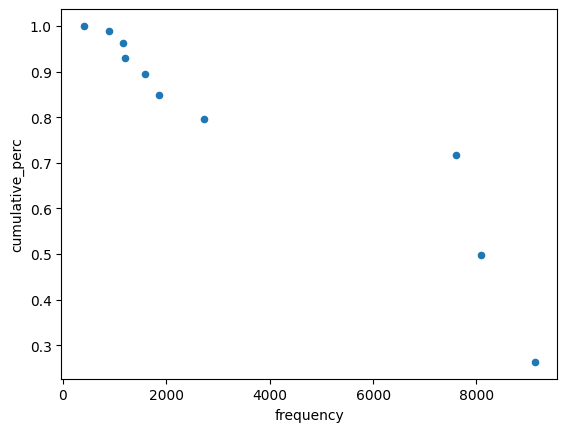

In [152]:
#Realizamos grafico de dispercion del DF filtrado
table1.plot('frequency','cumulative_perc',kind='scatter')

<Axes: xlabel='price'>

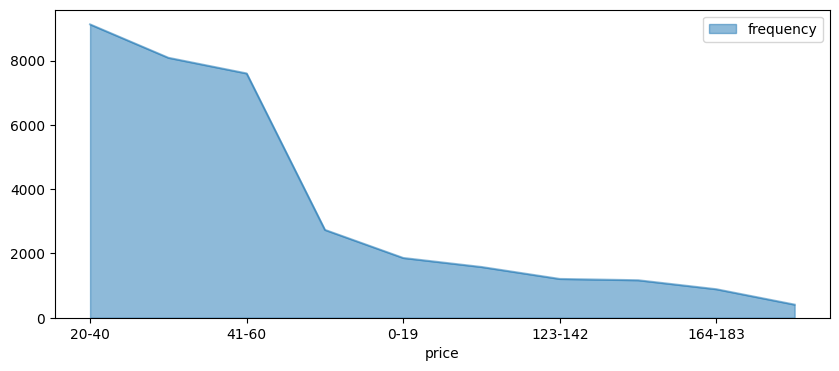

In [153]:
#Realoizamos grafico de area del DF filtrado
Filtro_index.plot(kind='area',figsize=(10,4),alpha=0.5)

Text(0, 0.5, 'Frecuencia')

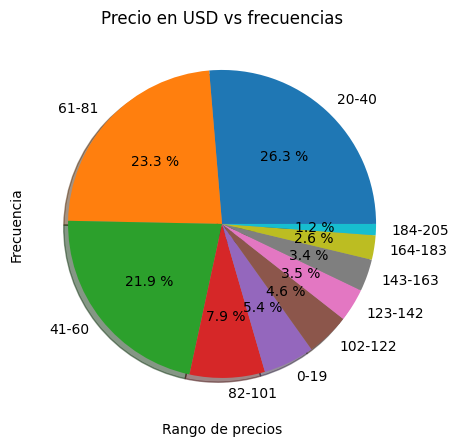

In [156]:
#Realizamos grafico de pastel del DF filtrado
Filtro_index['frequency'].plot(kind='pie',figsize=(10,5),shadow=True,autopct="%0.1f %%")
plt.title('Precio en USD vs frecuencias')
plt.xlabel('Rango de precios')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

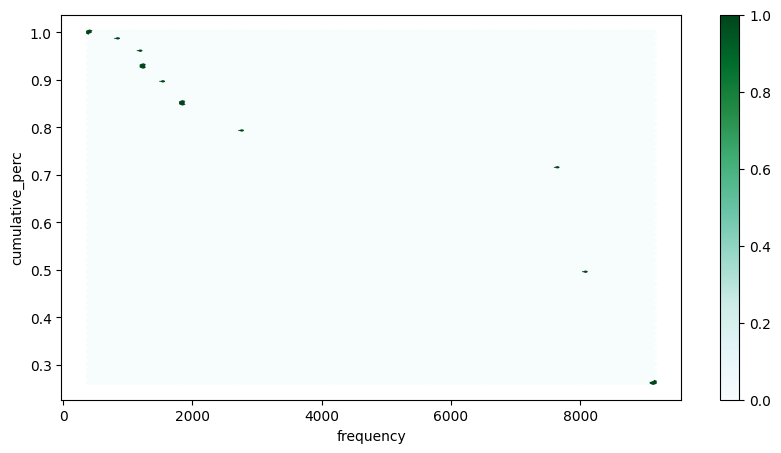

In [155]:
#Realizamos grafico hexagonal del DF filtrado, alternativo al scatter plot
table1.plot.hexbin('frequency','cumulative_perc',figsize=(10,5))

#**Modelo Explicativo de variables numericas**

In [ ]:
#Ajustar maximo de filas
pd.options.display.max_rows=None

In [ ]:
#Corroboramos valores nulos
valores_nulos=categoricas.isnull().sum()
valores_nulos

,0
host_response_rate,0
host_acceptance_rate,0
host_total_listings_count,0
accommodates,0
bathrooms,0
beds,0
price,0
availability_60,0
availability_90,0
availability_365,0
